Md. Tanvir Jawad<br>ID: 21101221

In [1]:
from sympy import symbols, Eq, solve

T, a, alpha, I, m, g, r = symbols('T a alpha I m g r')
eq1 = Eq(a, -r * alpha)
eq2 = Eq(T - m*g, m * a)
eq3 = Eq(T * r, I * alpha)
soln = solve([eq1, eq2, eq3], [T, a, alpha])
soln

{T: I*g*m/(I + m*r**2), a: -g*m*r**2/(I + m*r**2), alpha: g*m*r/(I + m*r**2)}

In [2]:
try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.0 MB/s eta 0:00:00


In [3]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/modsim.py')

Downloaded modsim.py


In [4]:
from modsim import *

In [5]:
from sympy import symbols, Eq, solve

T, a, alpha, I, m, g, r = symbols('T a alpha I m g r')

In [6]:
eq1 = Eq(a, -r * alpha)
eq1

Eq(a, -alpha*r)

In [7]:
eq2 = Eq(T - m * g, m * a)
eq2

Eq(T - g*m, a*m)

In [8]:
eq3 = Eq(T * r, I * alpha)
eq3

Eq(T*r, I*alpha)

In [9]:
soln = solve([eq1, eq2, eq3], [T, a, alpha])

In [10]:
soln[T]

I*g*m/(I + m*r**2)

In [11]:
soln[a]

-g*m*r**2/(I + m*r**2)

In [12]:
soln[alpha]

g*m*r/(I + m*r**2)

In [13]:
Rmin = 8e-3     # m
Rmax = 16e-3    # m
Rout = 35e-3    # m
mass = 50e-3    # kg
L = 1           # m
g = 9.8         # m / s**2

In [14]:
1 / (Rmax)

62.5

In [15]:
I = mass * Rout**2 / 2
I

3.0625000000000006e-05

In [16]:
k = (Rmax**2 - Rmin**2) / 2 / L
k

9.6e-05

In [17]:
init = State(theta=0, omega=0, y=L, v=0)

In [18]:
system = System(init=init, t_end=2)

In [19]:
from scipy.integrate import solve_ivp
from sympy import symbols, Eq, solve, sqrt

Rmin = 8e-3
Rmax = 16e-3
Rout = 35e-3
mass = 50e-3
L = 1
g = 9.8

I = mass * Rout**2 / 2

k = (Rmax**2 - Rmin**2) / (2 * L)

theta0, omega0, y0, v0 = 0, 0, L, 0

t_end = 2

In [23]:
def slope_func(t, state):
    theta, omega, y, v = state
    r = sqrt(max(2*k*y + Rmin**2, 0))

    T, a, alpha = symbols('T a alpha')
    eq1 = Eq(a, -r * alpha)
    eq2 = Eq(T - mass * g, mass * a)
    eq3 = Eq(T * r, (I + mass * r**2) * alpha)
    soln = solve([eq1, eq2, eq3], [T, a, alpha])

    a_value = float(soln[a])
    alpha_value = float(soln[alpha])

    dtheta_dt = omega
    domega_dt = alpha_value
    dy_dt = -r * omega
    dv_dt = a_value

    return [dtheta_dt, domega_dt, dy_dt, dv_dt]

In [24]:
def event_func(t, state):
    _, _, y, _ = state
    return y

In [25]:
event_func.terminal = True

# Running the simulation again with the corrected slope function
sol = solve_ivp(slope_func, [0, t_end], [theta0, omega0, y0, v0], events=event_func)

# Final state and time
final_state = sol.y[:, -1]
final_time = sol.t[-1]
final_state, final_time

(array([ 8.34043931e+01,  1.46023855e+02,  5.55111512e-17, -1.96571281e+00]),
 1.104209648472647)

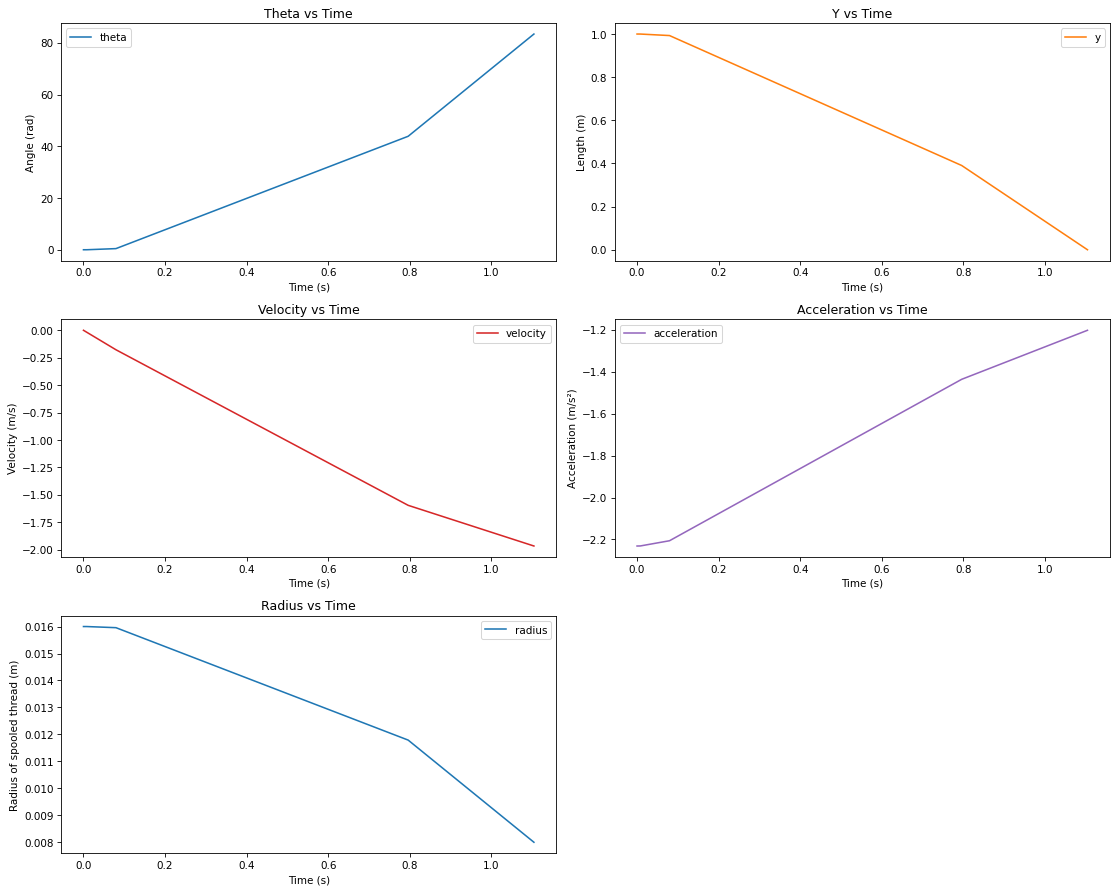

In [27]:
import matplotlib.pyplot as plt
time = sol.t
theta = sol.y[0]
y = sol.y[2]
v = sol.y[3]

a = np.gradient(v, time)
r = np.sqrt(2 * k * y + Rmin**2)
plt.figure(figsize=(15, 12))

# Theta vs Time
plt.subplot(3, 2, 1)
plt.plot(time, theta, color='C0', label='theta')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Theta vs Time')
plt.legend()

# Y vs Time
plt.subplot(3, 2, 2)
plt.plot(time, y, color='C1', label='y')
plt.xlabel('Time (s)')
plt.ylabel('Length (m)')
plt.title('Y vs Time')
plt.legend()

# Velocity vs Time
plt.subplot(3, 2, 3)
plt.plot(time, v, color='C3', label='velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.legend()

# Acceleration vs Time
plt.subplot(3, 2, 4)
plt.plot(time, a, color='C4', label='acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration vs Time')
plt.legend()

# Radius of Spooled Thread vs Time
plt.subplot(3, 2, 5)
plt.plot(time, r, label='radius')
plt.xlabel('Time (s)')
plt.ylabel('Radius of spooled thread (m)')
plt.title('Radius vs Time')
plt.legend()

plt.tight_layout()
plt.show()


**MODIFICATION**

Problem Statement:
Imagine a spool of thread hanging from the ceiling by the end of the thread. The spool is initially at rest, and when released, it starts falling and unwinding the thread. Your task is to simulate the descent of the spool and determine how long it takes to reach a certain length of unwound string.

In [28]:
# Given parameters for the spool
R_axle = 5e-3     # Radius of the axle (m)
R_outer = 20e-3   # Outer radius of the spool (m)
mass_spool = 30e-3  # Mass of the spool (kg)
L_thread = 0.5     # Length of the thread (m)
g = 9.8           # Acceleration due to gravity (m/s^2)

# Calculating moment of inertia for the spool (solid cylinder approximation)
I_spool = mass_spool * R_outer**2 / 2

# State object with initial conditions (theta = 0, omega = 0, y = L_thread, v = 0)
theta0_spool, omega0_spool, y0_spool, v0_spool = 0, 0, L_thread, 0

# System object with initial conditions and end time
t_end_spool = 5  # End time (s)

# Slope function for the spool system
def slope_func_spool(t, state):
    theta, omega, y, v = state
    r = R_axle  # Constant radius of the axle

    # Solving for T, a, and alpha
    T, a, alpha = symbols('T a alpha')
    eq1 = Eq(a, -r * alpha)
    eq2 = Eq(T - mass_spool * g, mass_spool * a)
    eq3 = Eq(T * r, (I_spool + mass_spool * r**2) * alpha)
    soln = solve([eq1, eq2, eq3], [T, a, alpha])

    # Unpacking the solution and ensuring non-complex values
    a_value = float(soln[a])
    alpha_value = float(soln[alpha])

    # Derivatives of theta, omega, y, and v
    dtheta_dt = omega
    domega_dt = alpha_value
    dy_dt = -r * omega
    dv_dt = a_value

    return [dtheta_dt, domega_dt, dy_dt, dv_dt]

# Event function to stop the simulation when y is 0 (end of the thread)
def event_func_spool(t, state):
    _, _, y, _ = state
    return y

# Make event function terminal
event_func_spool.terminal = True

# Running the simulation for the spool
sol_spool = solve_ivp(slope_func_spool, [0, t_end_spool], [theta0_spool, omega0_spool, y0_spool, v0_spool], events=event_func_spool)

# Final state and time for the spool
final_state_spool = sol_spool.y[:, -1]
final_time_spool = sol_spool.t[-1]
final_state_spool, final_time_spool


(array([ 1.00000000e+02,  1.97989899e+02,  1.11022302e-16, -9.89949494e-01]),
 1.0101525445522106)

Final Time: 1.01 seconds

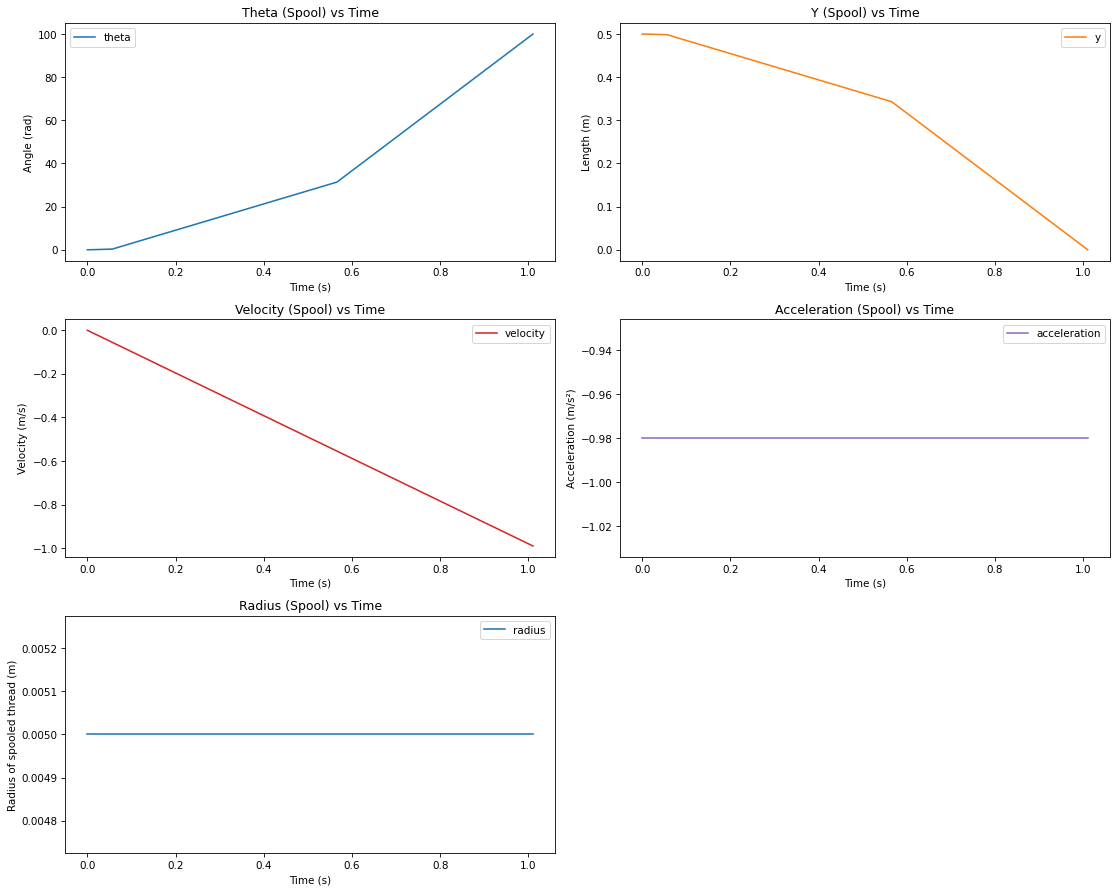

In [30]:
time_spool = sol_spool.t
theta_spool = sol_spool.y[0]
y_spool = sol_spool.y[2]
v_spool = sol_spool.y[3]

a_spool = np.gradient(v_spool, time_spool)

plt.figure(figsize=(15, 12))

# Theta vs Time for the Spool
plt.subplot(3, 2, 1)
plt.plot(time_spool, theta_spool, color='C0', label='theta')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Theta (Spool) vs Time')
plt.legend()

# Y vs Time for the Spool
plt.subplot(3, 2, 2)
plt.plot(time_spool, y_spool, color='C1', label='y')
plt.xlabel('Time (s)')
plt.ylabel('Length (m)')
plt.title('Y (Spool) vs Time')
plt.legend()

# Velocity vs Time for the Spool
plt.subplot(3, 2, 3)
plt.plot(time_spool, v_spool, color='C3', label='velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity (Spool) vs Time')
plt.legend()

# Acceleration vs Time for the Spool
plt.subplot(3, 2, 4)
plt.plot(time_spool, a_spool, color='C4', label='acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration (Spool) vs Time')
plt.legend()

# Radius of Spooled Thread vs Time for the Spool
plt.subplot(3, 2, 5)
plt.plot(time_spool, np.full_like(time_spool, R_axle), label='radius')
plt.xlabel('Time (s)')
plt.ylabel('Radius of spooled thread (m)')
plt.title('Radius (Spool) vs Time')
plt.legend()

plt.tight_layout()
plt.show()

Here are the plots for various aspects of the spool's motion during its descent:

Theta (Spool) vs Time: This plot shows the increase in the angle (theta) of the spool over time, indicating its rotation as it unwinds.

Y (Spool) vs Time: This graph illustrates the decrease in the length of the spooled string (y) as the spool unwinds and falls.

Velocity (Spool) vs Time: This plot displays the change in velocity of the spool over time, highlighting how the velocity evolves as the spool descends.

Acceleration (Spool) vs Time: Here, the acceleration of the spool is shown, estimated from the gradient of the velocity. It provides insights into how the spool's acceleration varies during the descent.

Radius (Spool) vs Time: This plot shows the radius of the spooled thread, which remains constant (equal to the axle radius) as the spool unwinds.

These plots collectively provide a detailed view of the dynamics of the spool's descent, capturing its rotational and translational motion as the string unwinds.